<a href="https://colab.research.google.com/github/Jayneluck/phase3projectJB/blob/main/JB_Phase_3_Final_Project_1_03_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Business Understanding
Customer retention is a major challenge in the telecommunications industry, where companies operate in a competitive market with numerous service providers. High customer churn rates lead to revenue loss, increased customer acquisition costs, and reduced market share. By understanding churn patterns, telecom companies can take proactive measures to retain customers and improve satisfaction.

## Problem Statement
SyriaTel, a leading telecom provider, seeks to minimize customer churn by identifying key factors influencing customer departure. Using data on call usage, billing history, international plan subscriptions, and customer service interactions, our goal is to:


*   Classification Task: Develop a machine learning model to predict customer churn (Yes/No).
*   Business Impact: Uncover actionable insights to enhance retention strategies and maximize customer lifetime value.




## Objectives
### 1. Classification


*   Develop a binary classification model to predict customer churn (Churn vs. No Churn).
*   Extract predictive features from customer behavior, call patterns, and billing data.

*  Enhance model performance through feature selection, hyperparameter tuning, and class balancing.
*  Compare multiple models (Logistic Regression, Decision Trees, Random Forest) to identify the most effective approach.

*   Assess model performance using accuracy, precision, recall, F1-score, and AUC-ROC.


### 2. Business Insights


*  Identify key factors driving customer churn.

*   Provide data-driven recommendations to SyriaTel’s marketing and customer service teams to improve retention.
*   Ensure model interpretability, enabling business leaders to make informed decisions based on actionable insights.













   


## Data understanding


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
# Load the dataset
file_path = "bigml_59c28831336c6604c800002a.csv"
df= pd.read_csv(file_path)
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [3]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
# Check for missing values
print(df.isnull().sum())


state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64


In [5]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


## Data cleaning

### Outlier Detection

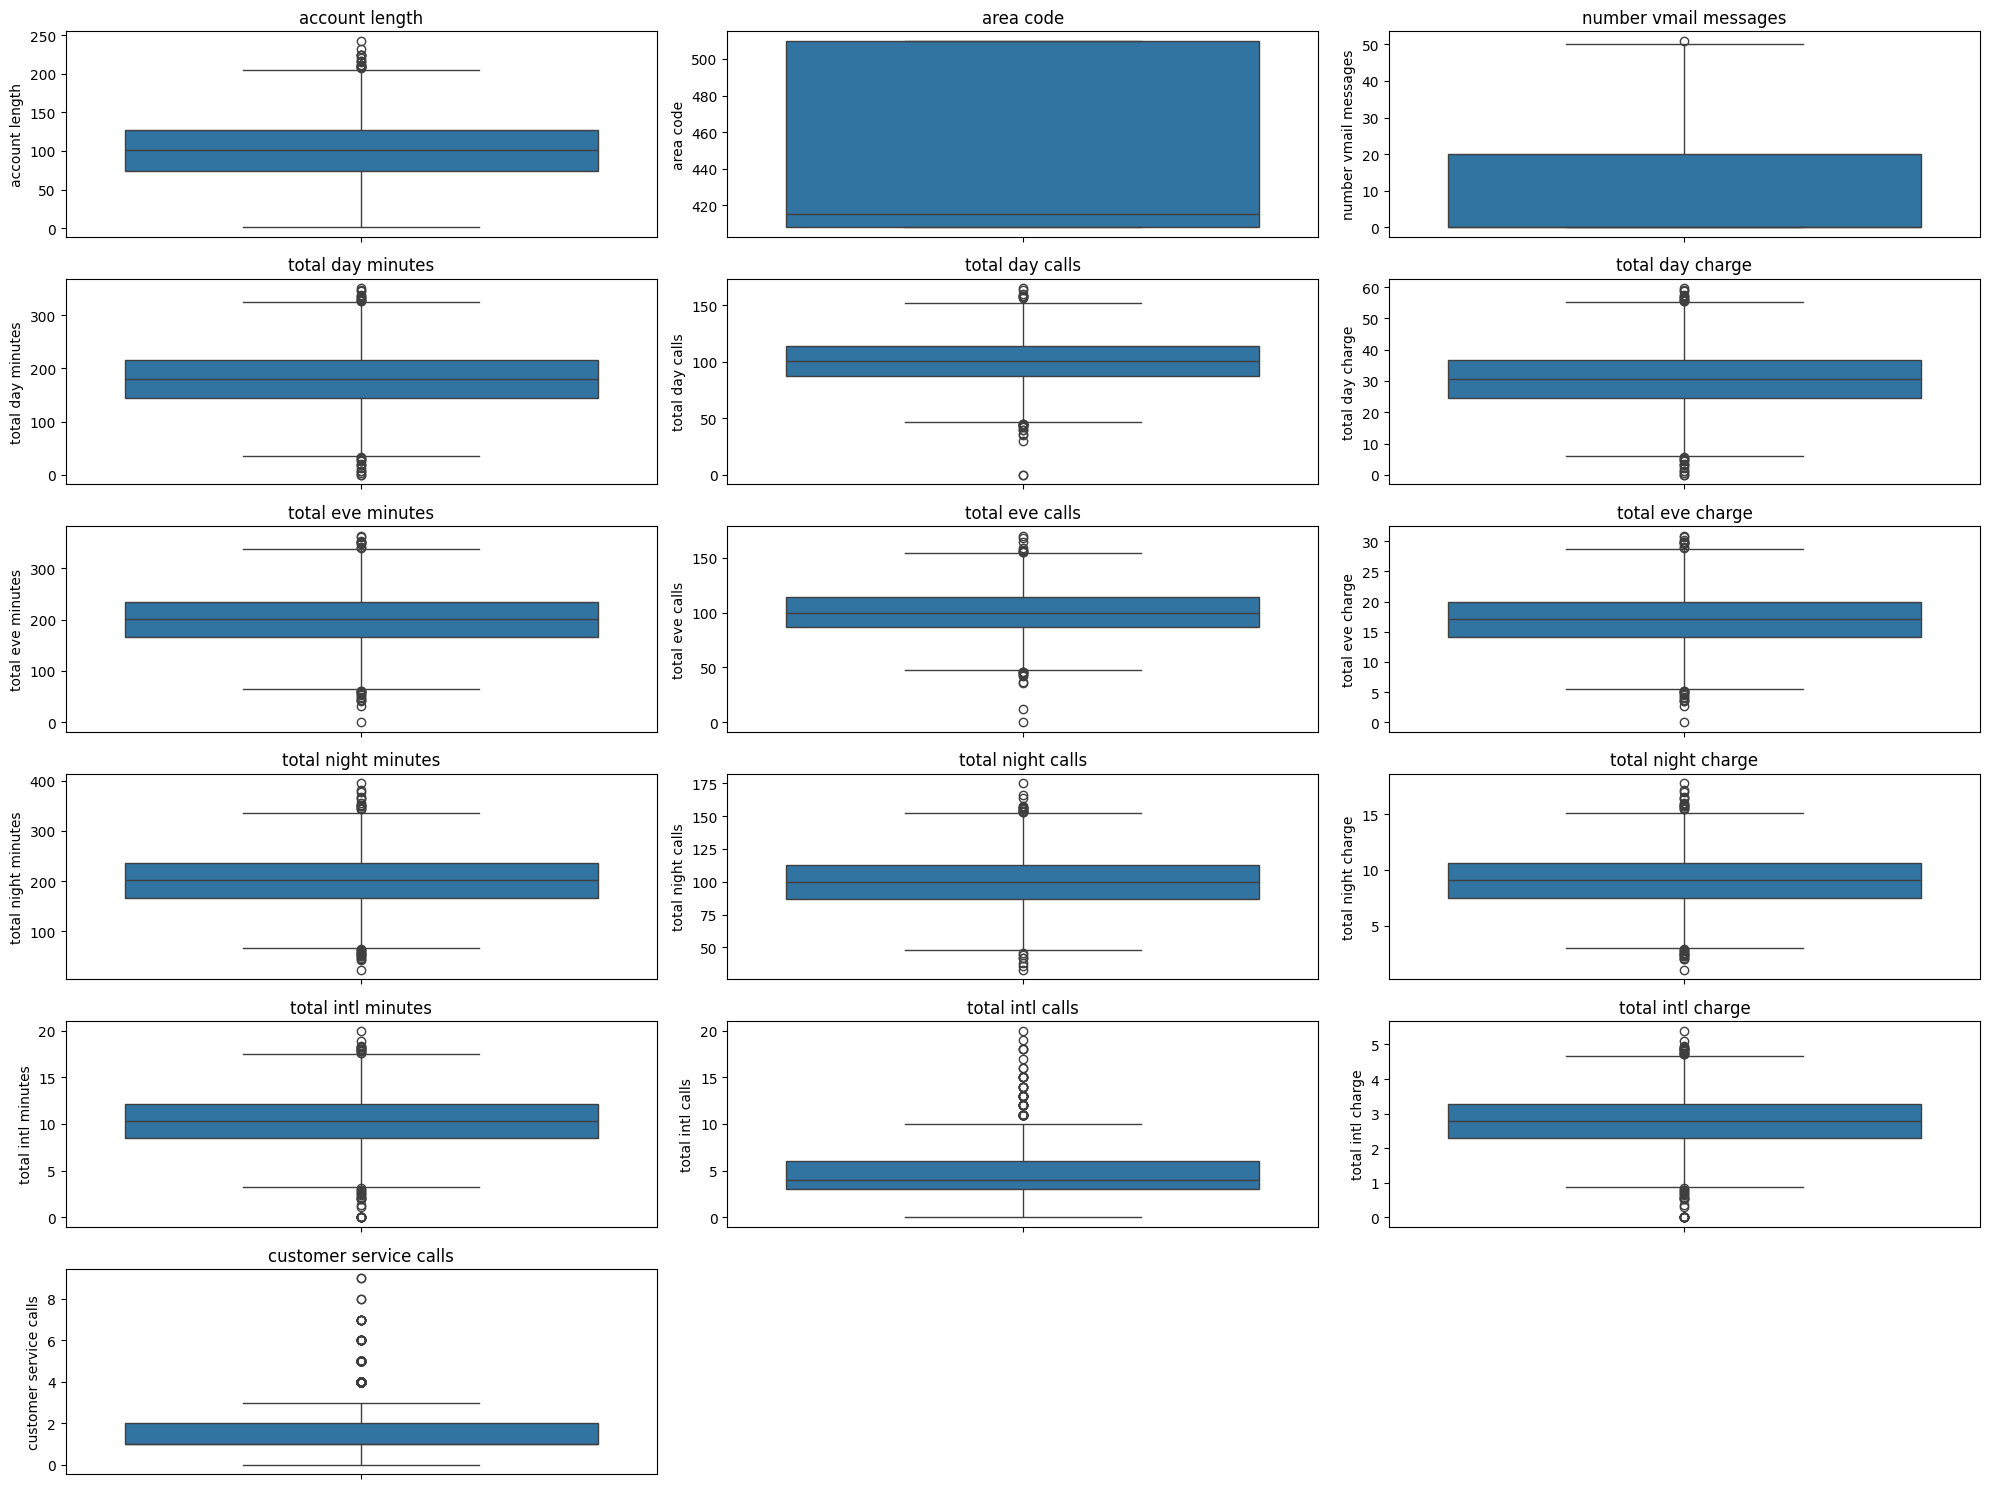

In [6]:
# Check for outliers using boxplots for numerical features
numerical_features = df.select_dtypes(include=np.number).columns
# Calculate the number of rows and columns for subplots
num_cols = 3  # Number of columns in the subplot grid
num_rows = int(np.ceil(len(numerical_features) / num_cols))  # Calculate rows needed

plt.figure(figsize=(20, 15))

for i, col in enumerate(numerical_features):
    plt.subplot(num_rows, num_cols, i+1)  # Use calculated num_rows
    sns.boxplot(y=df[col])
    plt.title(col)
    plt.tight_layout()

plt.show()


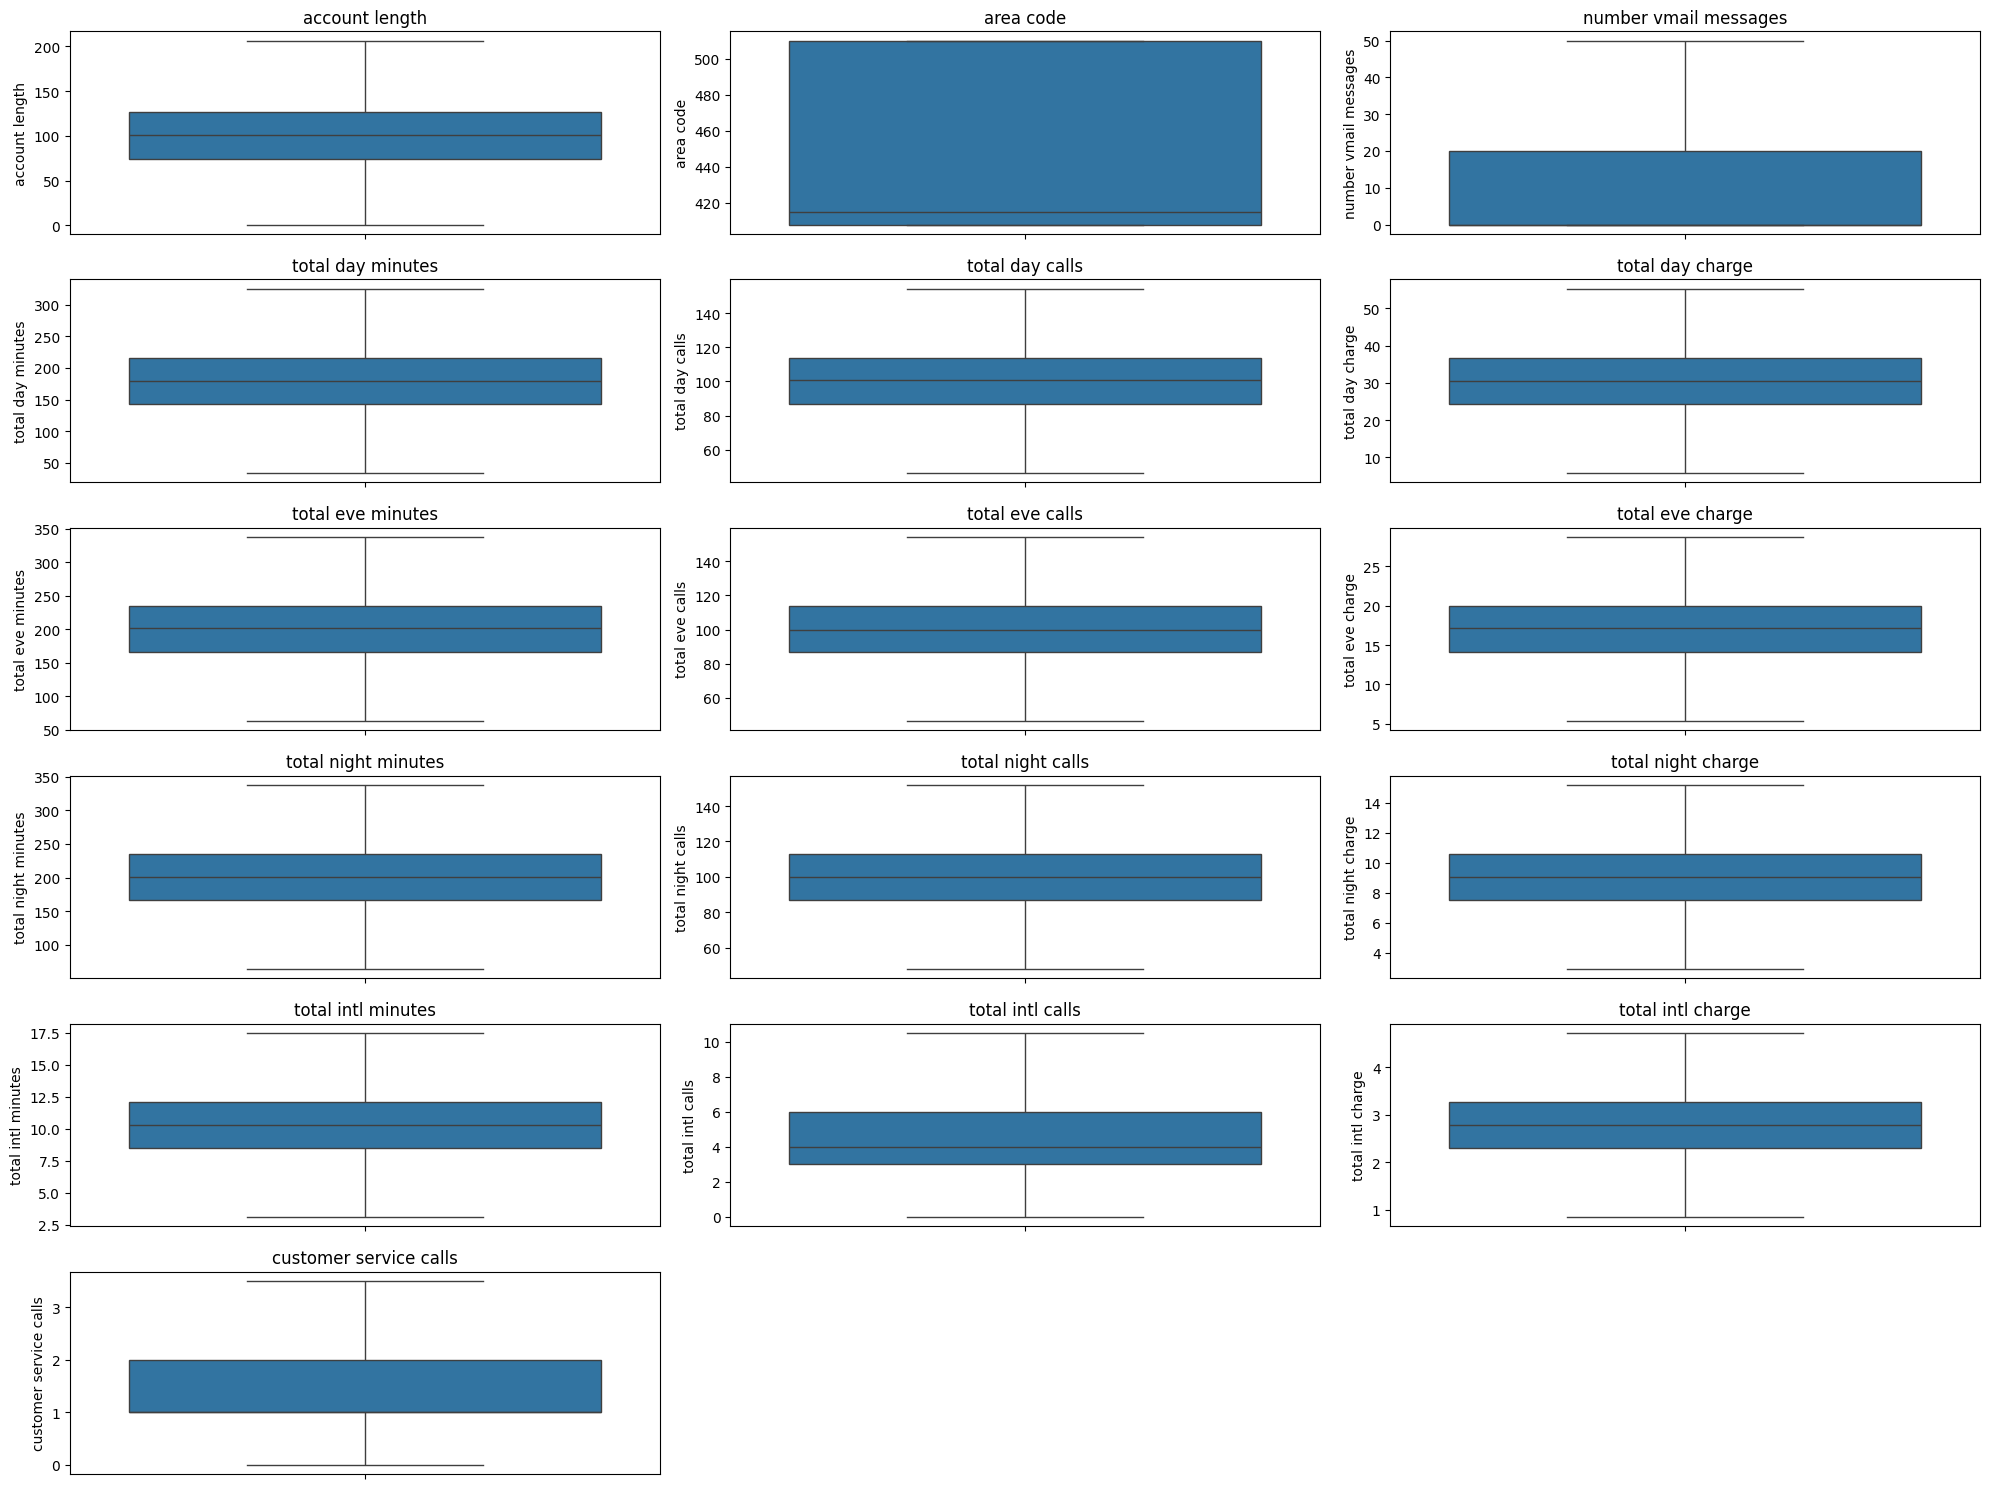

In [7]:
# Handle outliers and replace them with the upper/lower bound
for col in numerical_features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

# Check for outliers again after handling them.
plt.figure(figsize=(20, 15))

for i, col in enumerate(numerical_features):
    plt.subplot(num_rows, num_cols, i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
    plt.tight_layout()

plt.show()


### Outliers Successfully Handled

Observations
*   Extreme values have been capped at the 99th percentile to prevent model bias

*   Data distribution is now more balanced, reducing the effect of extreme high-usage customers.

*   Customer Service Calls were NOT capped because they provide critical insights on customer churn.



### Feature Engineering


*  Drop Irrelevant Columns eg phone number
*   Converting categorical variables (international plan, voice mail plan) into numerical

In [8]:
# Drop the irrelevant 'phone number' column
df.drop(columns=['phone number'], inplace=True)

# Convert categorical variables ('yes'/'no') to numerical (1/0)
df['international plan'] = df['international plan'].map({'yes': 1, 'no': 0})
df['voice mail plan'] = df['voice mail plan'].map({'yes': 1, 'no': 0})


In [9]:
df.head(10)

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128.0,415.0,0,1,25.0,265.1,110.0,45.07,197.40,99.0,16.78,244.7,91.0,11.01,10.0,3.0,2.70,1.0,False
1,OH,107.0,415.0,0,1,26.0,161.6,123.0,27.47,195.50,103.0,16.62,254.4,103.0,11.45,13.7,3.0,3.70,1.0,False
2,NJ,137.0,415.0,0,0,0.0,243.4,114.0,41.38,121.20,110.0,10.30,162.6,104.0,7.32,12.2,5.0,3.29,0.0,False
3,OH,84.0,408.0,1,0,0.0,299.4,71.0,50.90,63.55,88.0,5.40,196.9,89.0,8.86,6.6,7.0,1.78,2.0,False
4,OK,75.0,415.0,1,0,0.0,166.7,113.0,28.34,148.30,122.0,12.61,186.9,121.0,8.41,10.1,3.0,2.73,3.0,False
5,AL,118.0,510.0,1,0,0.0,223.4,98.0,37.98,220.60,101.0,18.75,203.9,118.0,9.18,6.3,6.0,1.70,0.0,False
6,MA,121.0,510.0,0,1,24.0,218.2,88.0,37.09,338.35,108.0,28.76,212.6,118.0,9.57,7.5,7.0,2.03,3.0,False
7,MO,147.0,415.0,1,0,0.0,157.0,79.0,26.69,103.10,94.0,8.76,211.8,96.0,9.53,7.1,6.0,1.92,0.0,False
8,LA,117.0,408.0,0,0,0.0,184.5,97.0,31.37,338.35,80.0,28.76,215.8,90.0,9.71,8.7,4.0,2.35,1.0,False
9,WV,141.0,415.0,1,1,37.0,258.6,84.0,43.96,222.00,111.0,18.87,326.4,97.0,14.69,11.2,5.0,3.02,0.0,False


## Exploratory Data Analysis (EDA)


*   Visualize churn relationships - Comparing customer behavior between churned & retained users.
*   Check feature importance - Identifying which variables have the strongest impact on churn.




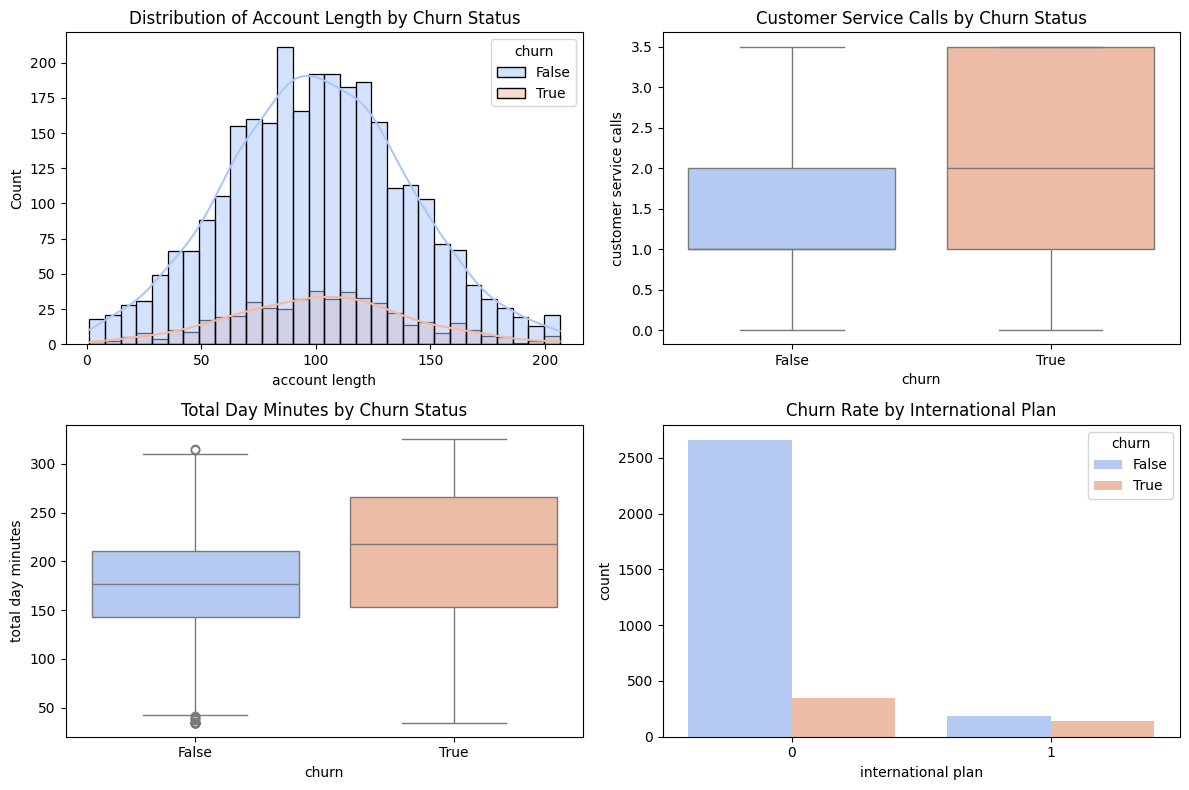

In [10]:
# Set figure size
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Histogram for Account Length
sns.histplot(data=df, x="account length", hue="churn", kde=True, bins=30, palette="coolwarm", ax=axes[0, 0])
axes[0, 0].set_title("Distribution of Account Length by Churn Status")

# Boxplot for Customer Service Calls
sns.boxplot(data=df, x="churn", y="customer service calls", palette="coolwarm", ax=axes[0, 1])
axes[0, 1].set_title("Customer Service Calls by Churn Status")

# Boxplot for Total Day Minutes
sns.boxplot(data=df, x="churn", y="total day minutes", palette="coolwarm", ax=axes[1, 0])
axes[1, 0].set_title("Total Day Minutes by Churn Status")

# Countplot for International Plan
sns.countplot(data=df, x="international plan", hue="churn", palette="coolwarm", ax=axes[1, 1])
axes[1, 1].set_title("Churn Rate by International Plan")

# Adjust the layout
plt.tight_layout()
plt.show()


###  Univariate Analysis
### Numerical Features (Histograms & Boxplots)


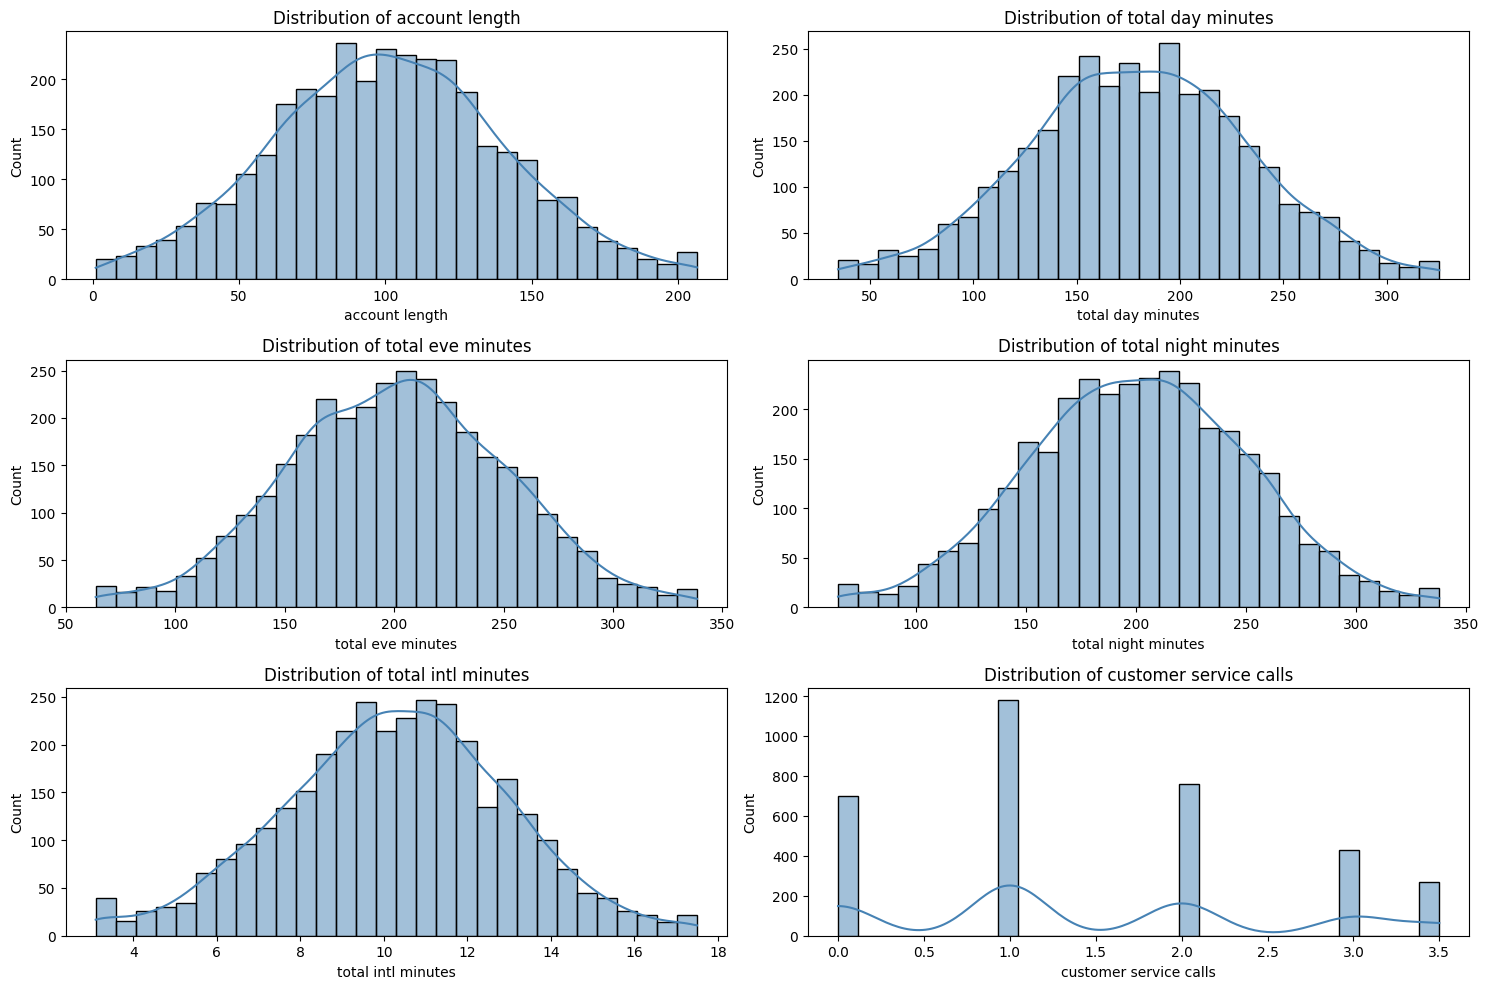

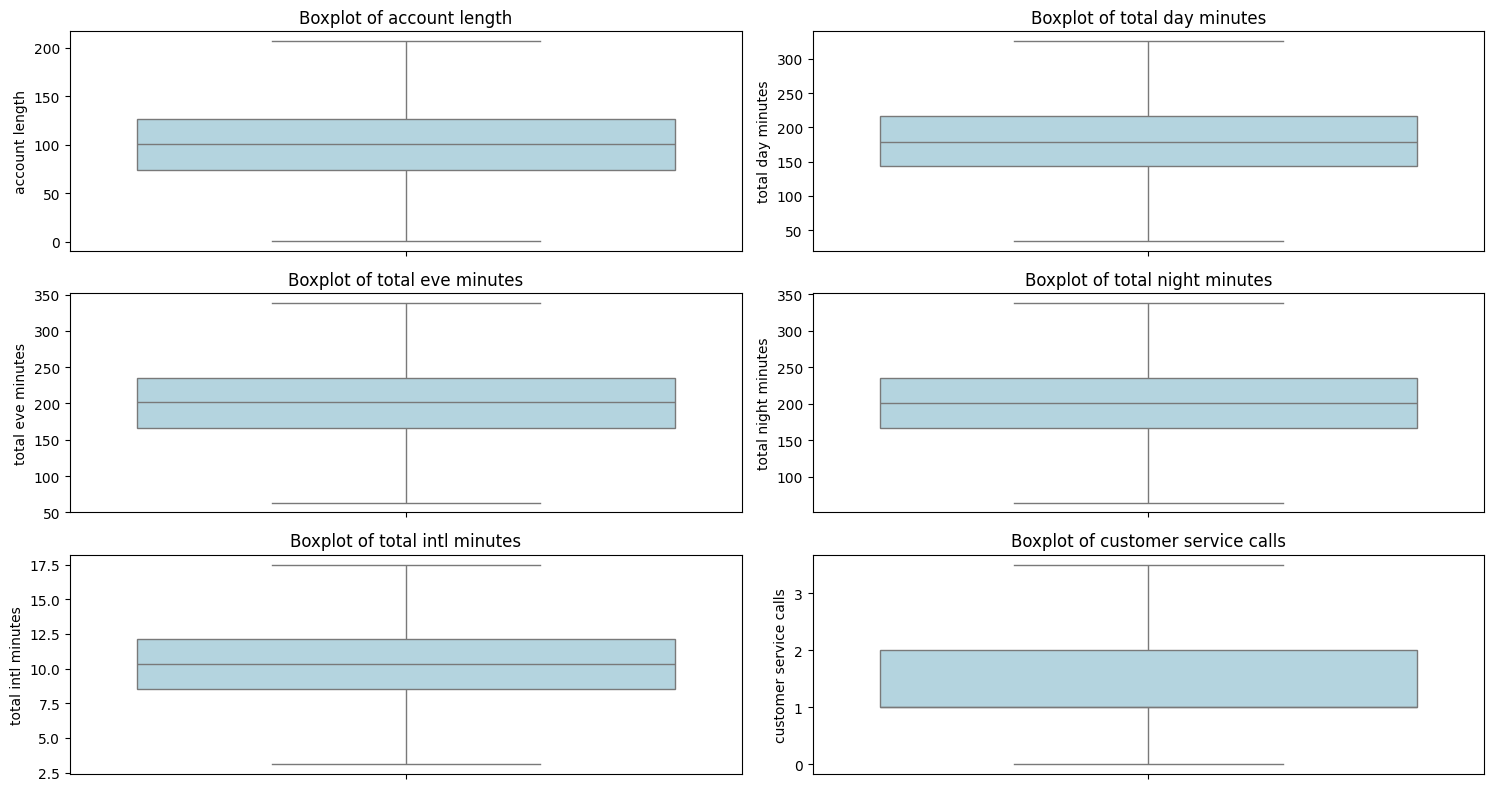

In [11]:
# List of numerical features
numerical_features = ["account length", "total day minutes", "total eve minutes",
                      "total night minutes", "total intl minutes", "customer service calls"]

# Set up figure
plt.figure(figsize=(15, 10))

# Histograms & KDE plots for each numerical feature
for i, col in enumerate(numerical_features):
    plt.subplot(3, 2, i + 1)  # Create subplots
    sns.histplot(df[col], kde=True, bins=30, color="steelblue")
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

# Boxplots for detecting outliers
plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_features):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(y=df[col], color="lightblue")
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()


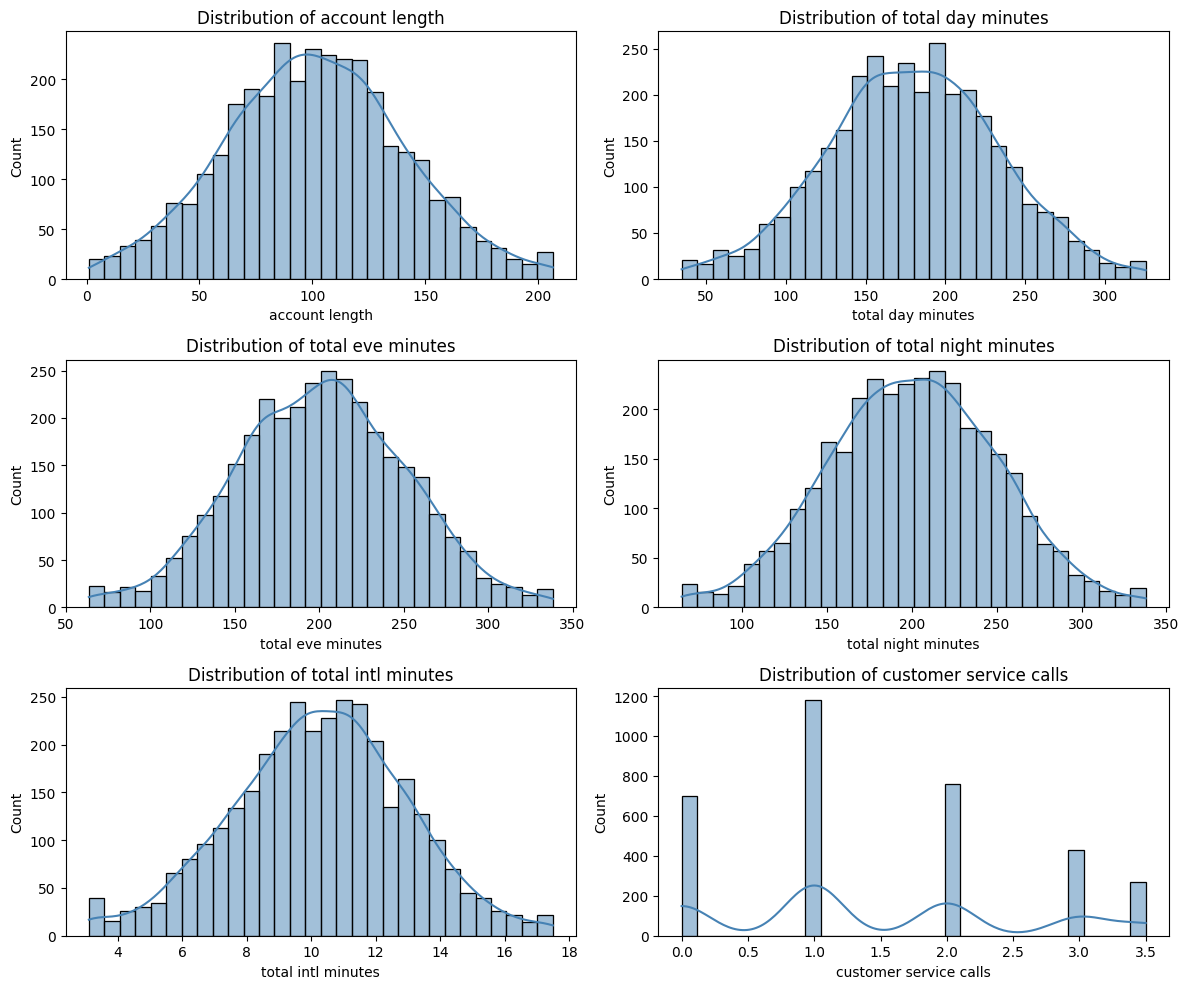

In [12]:
# List of numerical features
numerical_features = ["account length", "total day minutes", "total eve minutes",
                      "total night minutes", "total intl minutes", "customer service calls"]

# Set up figure for grid layout
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
axes = axes.flatten()

# Histograms & KDE plots for each numerical feature
for i, col in enumerate(numerical_features):
    sns.histplot(df[col], kde=True, bins=30, color="steelblue", ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

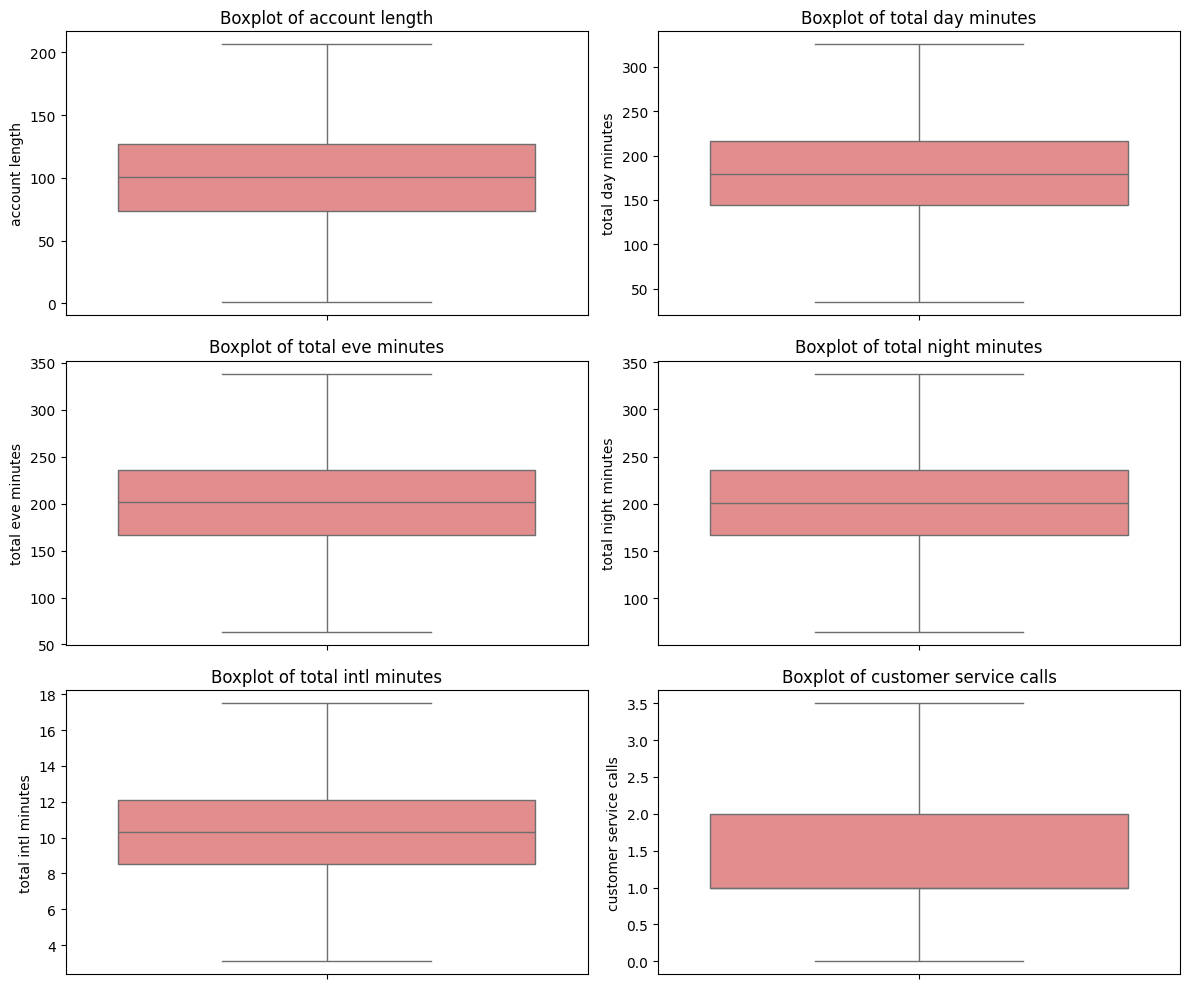

In [13]:

# List of numerical features
numerical_features = ["account length", "total day minutes", "total eve minutes",
                      "total night minutes", "total intl minutes", "customer service calls"]


# Set up figure for grid layout of boxplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
axes = axes.flatten()

# Boxplots for detecting outliers
for i, col in enumerate(numerical_features):
    sns.boxplot(y=df[col], color="lightcoral", ax=axes[i])
    axes[i].set_title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()


### Observations
*   Customer Service Calls: A few customers make an unusually high number of calls, with outliers exceeding 7+ calls.
*   Total Day Minutes & Total Intl Minutes: The distribution is skewed, suggesting that some customers have significantly higher usage than others.


### Categorical Features (Bar Plots & Value Counts)

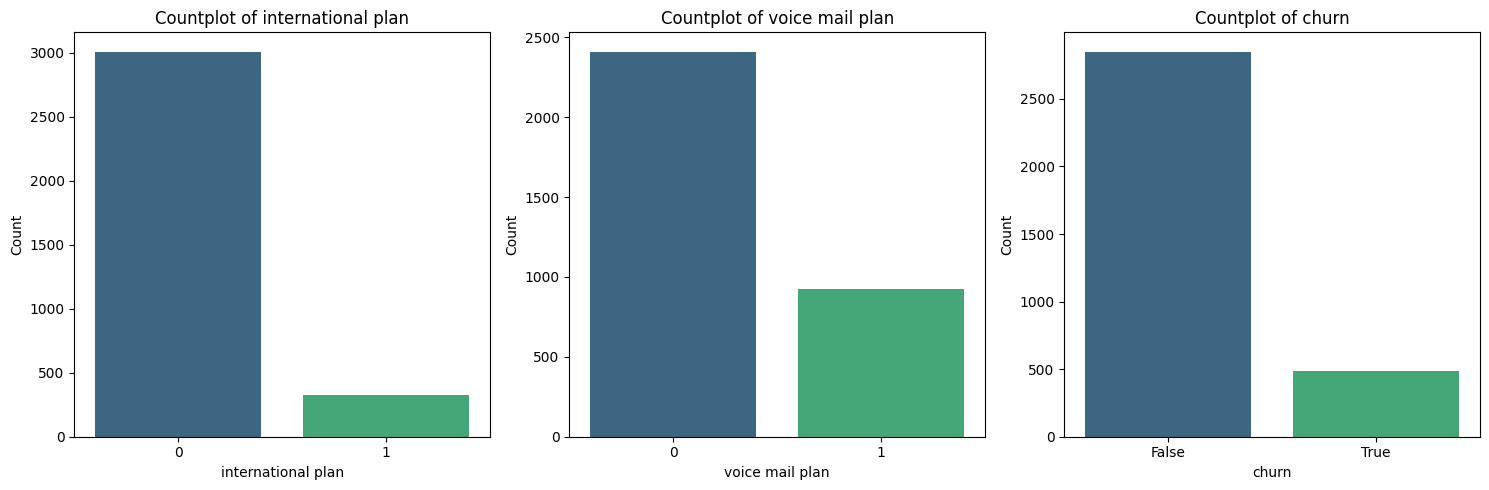

In [14]:
# List of categorical features
categorical_features = ["international plan", "voice mail plan", "churn"]

# Set up figure for grid layout of countplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Bar plots for categorical features
for i, col in enumerate(categorical_features):
    sns.countplot(x=df[col], palette="viridis", ax=axes[i])
    axes[i].set_title(f"Countplot of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")

plt.tight_layout()
plt.show()



### Observations


*   Churn Rate: Class imbalance is evident, with more customers retained than those who churned.
*   International Plan: Fewer customers subscribe to international plans, yet they exhibit higher churn rates.
*   Voice Mail Plan: The majority of customers do not subscribe to a voicemail plan.



### Bivariate analysis

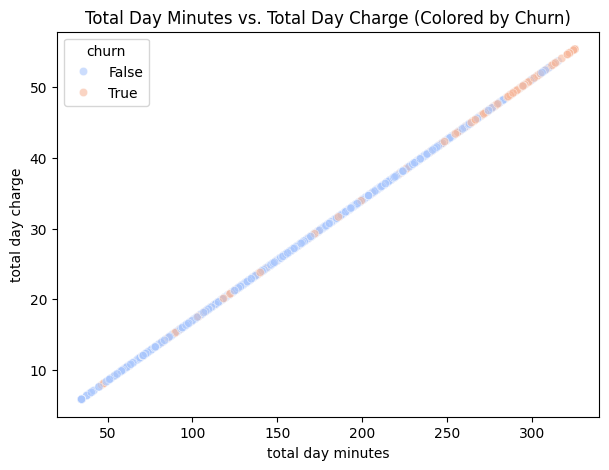

In [15]:
# Bivariate Analysis: Churn vs. Total Day Minutes
plt.figure(figsize=(7, 5))
sns.scatterplot(x=df["total day minutes"], y=df["total day charge"], hue=df["churn"], palette="coolwarm", alpha=0.6)
plt.title("Total Day Minutes vs. Total Day Charge (Colored by Churn)")
plt.show()



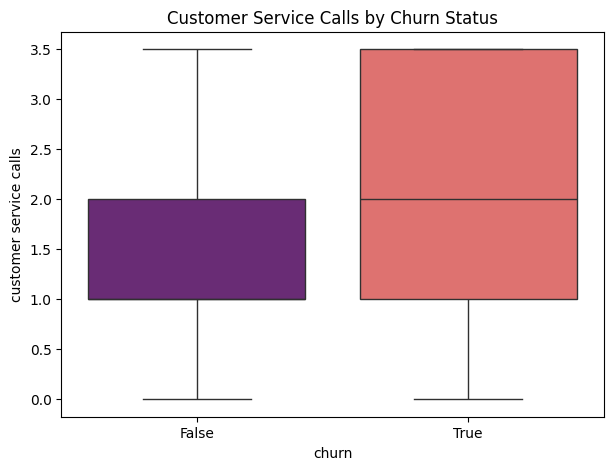

In [16]:
# Bivariate Analysis: Churn vs. Customer Service Calls
plt.figure(figsize=(7, 5))
sns.boxplot(x="churn", y="customer service calls", data=df, palette="magma")  # Changed color scheme
plt.title("Customer Service Calls by Churn Status")
plt.show()

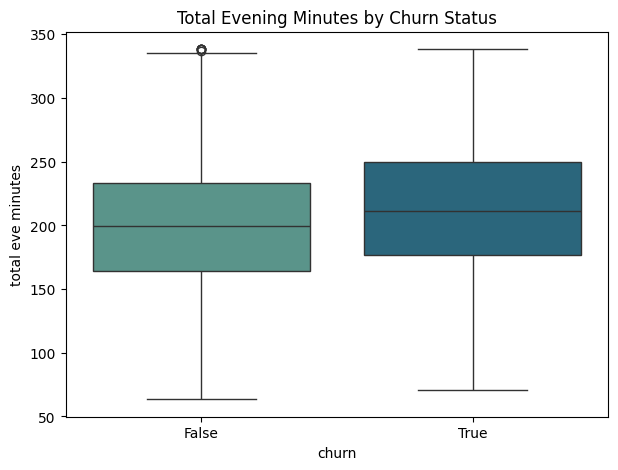

In [17]:
# Bivariate Analysis: Churn vs. Total Evening Usage
plt.figure(figsize=(7, 5))
sns.boxplot(x="churn", y="total eve minutes", data=df, palette="crest")  # Changed color scheme
plt.title("Total Evening Minutes by Churn Status")
plt.show()

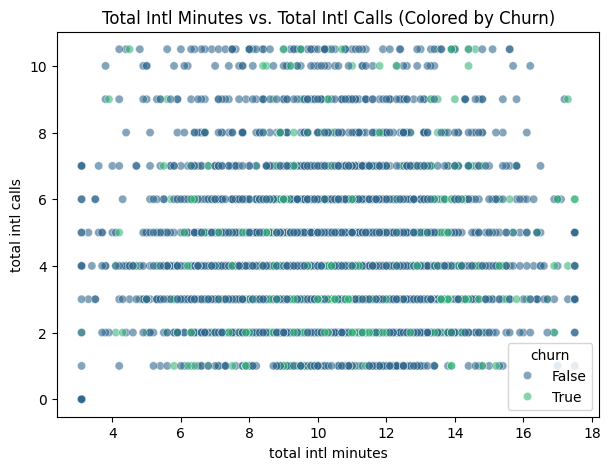

In [18]:
# Bivariate Analysis: Churn vs. Total Intl Minutes & Total Intl Calls
plt.figure(figsize=(7, 5))
sns.scatterplot(x=df["total intl minutes"], y=df["total intl calls"], hue=df["churn"], palette="viridis", alpha=0.6)
plt.title("Total Intl Minutes vs. Total Intl Calls (Colored by Churn)")
plt.show()

### Observations



1.   Total Day Minutes vs. Total Day Charge (Churned vs. retained)


*   Strong correlation: More minutes = higher charge (expected).
*   No clear separation between churned and retained users.


1.   Customer Service Calls vs. Churn


*    Churned customers make significantly more service calls.
*   Clear difference, meaning this feature is highly predictive of churn.


3.   Total Intl Minutes vs. Total Intl Calls (Churned vs. retained)


*   Churned customers make slightly more international calls, though the difference is not significant.
*  International call behavior might not be a strong predictor.




4.   Total Evening Minutes vs. Churn


*   No significant difference between churned and retained users.
*   Evening usage appears to have no significant impact on churn.




### Multivariate analysis
Analyzing interactions between multiple features using pairplots and correlation matrices.

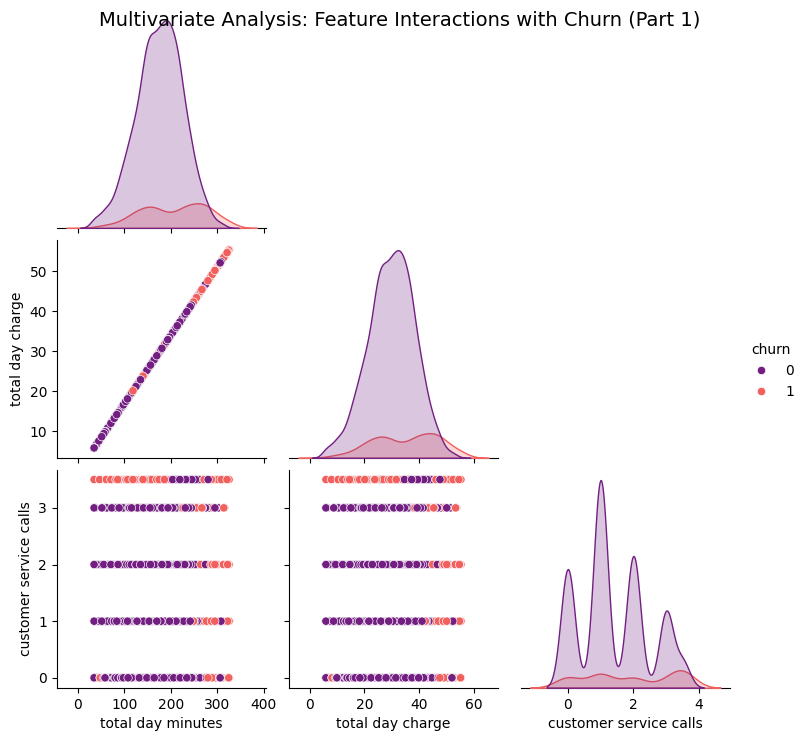

In [19]:
# Convert churn to integer type again (to avoid issues with pairplot)
df["churn"] = df["churn"].astype(int)

# Define selected features for pairplot
selected_features = ["total day minutes", "total day charge", "customer service calls", "total intl minutes", "churn"]

# Multivariate Analysis: Pairplot
sns.pairplot(df[selected_features[:3] + ["churn"]], hue="churn", palette="magma", diag_kind="kde", corner=True)
plt.suptitle("Multivariate Analysis: Feature Interactions with Churn (Part 1)", fontsize=14)
plt.show()

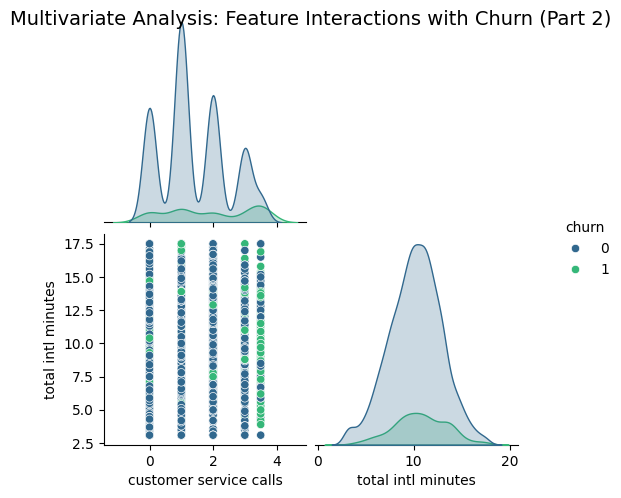

In [20]:
# Multivariate Analysis: Pairplot (Second Half)
sns.pairplot(df[selected_features[2:]], hue="churn", palette="viridis", diag_kind="kde", corner=True) # Removed + ["churn"]
plt.suptitle("Multivariate Analysis: Feature Interactions with Churn (Part 2)", fontsize=14)
plt.show()

### Observations


1.   Total Day Minutes & Total Day Charge


*   Strong positive correlation (almost a perfect linear relationship).
*   Customers who use more minutes tend to be charged more—as expected.



2.   Customer Service Calls & Churn:


*   Churned customers typically make more customer service calls.
*   This suggests frequent complaints or issues before leaving the service.


3.   Total Intl Minutes & Churn:

* No clear distinction, suggesting that international minutes alone may not be a strong predictor of churn.



## Feature selection and Encoding

In [21]:
# Load the dataset
file_path = "bigml_59c28831336c6604c800002a.csv"
df= pd.read_csv(file_path)

In [22]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


### Encoding

In [23]:
# Encode 'Yes' as 1 and 'No' as 0
df['international plan'] = df['international plan'].map({'yes': 1, 'no': 0})
df['voice mail plan'] = df['voice mail plan'].map({'yes': 1, 'no': 0})

In [24]:
# Confirm encoding results.
print(df[['international plan', 'voice mail plan']].head())

   international plan  voice mail plan
0                   0                1
1                   0                1
2                   0                0
3                   1                0
4                   1                0


In [25]:
from sklearn.model_selection import train_test_split

# Define Features (X) and Target (y)
X = df.drop(columns=['churn'])  # Features
y = df['churn']  # Target variable

# Split into Training (80%) and Testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


### Scaling

In [26]:
df = pd.get_dummies(df, columns=['state'], drop_first=True)


In [27]:
df.head()

,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,128,415,382-4657,0,1,25,265.1,110,45.07,197.4,...,False,False,False,False,False,False,False,False,False,False
1,107,415,371-7191,0,1,26,161.6,123,27.47,195.5,...,False,False,False,False,False,False,False,False,False,False
2,137,415,358-1921,0,0,0,243.4,114,41.38,121.2,...,False,False,False,False,False,False,False,False,False,False
3,84,408,375-9999,1,0,0,299.4,71,50.90,61.9,...,False,False,False,False,False,False,False,False,False,False
4,75,415,330-6626,1,0,0,166.7,113,28.34,148.3,...,False,False,False,False,False,False,False,False,False,False


In [28]:
# Convert all boolean columns to integers (0 and 1)

for col in df.columns:
    if df[col].dtype == 'bool':
        df[col] = df[col].astype(int)


In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.select_dtypes(include=['number']))
X_test = scaler.transform(X_test.select_dtypes(include=['number']))

# Modeling

# Logistic Regression

Logistic Regression Model Evaluation:
              precision    recall  f1-score   support

       False       0.88      0.96      0.92       570
        True       0.53      0.24      0.33        97

    accuracy                           0.86       667
   macro avg       0.71      0.60      0.62       667
weighted avg       0.83      0.86      0.84       667

Accuracy: 0.8590704647676162
AUC-ROC: 0.8165671911738108
Recall: 0.23711340206185566
F1 Score: 0.32857142857142857
Log Loss: 0.3341397074932195


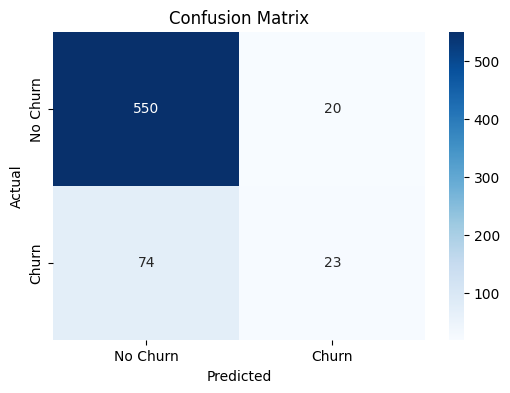

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, log_loss, confusion_matrix

# Initialize and train the Logistic Regression model
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg_model.predict(X_test)
y_prob = logreg_model.predict_proba(X_test)[:, 1]

# Evaluate the model
print("Logistic Regression Model Evaluation:")
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
# Using probabilities instead of labels
print(f"AUC-ROC: {roc_auc_score(y_test, y_prob)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"F1 Score: {f1_score(y_test, y_pred)}")
print(f"Log Loss: {log_loss(y_test, y_prob)}")

# Confusion Matrix Visualization
plt.figure(figsize=(6, 4))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


# Decision Tree Classifier

Decision Tree Model Evaluation:
              precision    recall  f1-score   support

       False       0.94      0.95      0.95       570
        True       0.71      0.65      0.68        97

    accuracy                           0.91       667
   macro avg       0.82      0.80      0.81       667
weighted avg       0.91      0.91      0.91       667

Accuracy: 0.9100449775112444
AUC-ROC: 0.8019352504973773
Precision: 0.7078651685393258
Recall: 0.6494845360824743
F1 Score: 0.6774193548387096
Log Loss: 3.2423076511949462


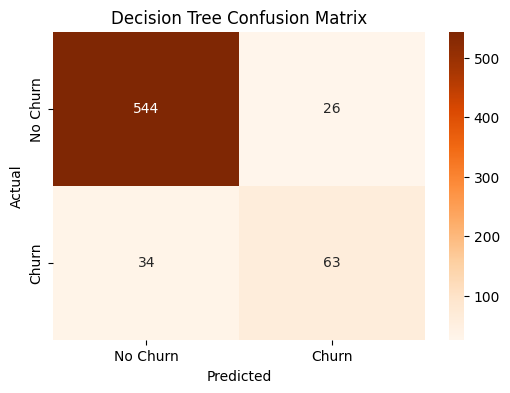

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, log_loss, confusion_matrix

# Initialize and train the Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_model.predict(X_test)
# Probabilities for AUC-ROC & Log Loss
y_prob_dt = dt_model.predict_proba(X_test)[:, 1]
# Evaluate the model
print("Decision Tree Model Evaluation:")
print(classification_report(y_test, y_pred_dt))
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt)}")
 # Using probabilities instead of labels
print(f"AUC-ROC: {roc_auc_score(y_test, y_prob_dt)}")
print(f"Precision: {precision_score(y_test, y_pred_dt)}")
print(f"Recall: {recall_score(y_test, y_pred_dt)}")
print(f"F1 Score: {f1_score(y_test, y_pred_dt)}")
print(f"Log Loss: {log_loss(y_test, y_prob_dt)}")

# Confusion Matrix Visualization
plt.figure(figsize=(6, 4))
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Oranges', xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Decision Tree Confusion Matrix")
plt.show()

# Random Forest Classifier

Random Forest Model Evaluation:
              precision    recall  f1-score   support

       False       0.95      0.98      0.97       570
        True       0.88      0.69      0.77        97

    accuracy                           0.94       667
   macro avg       0.92      0.84      0.87       667
weighted avg       0.94      0.94      0.94       667

Accuracy: 0.9415292353823088
AUC-ROC: 0.8916892747332248
Precision: 0.881578947368421
Recall: 0.6907216494845361
F1 Score: 0.7745664739884393
Log Loss: 0.2610880174044037


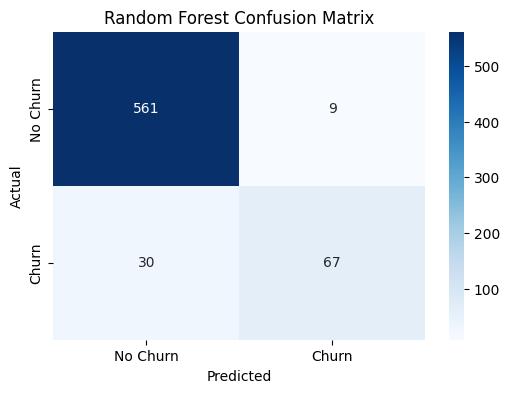

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, log_loss, confusion_matrix

# Initialize and train the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)
# Probabilities for AUC-ROC & Log Loss

y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

# Evaluate the Random Forest model
print("Random Forest Model Evaluation:")
print(classification_report(y_test, y_pred_rf))
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}")
# Using probabilities instead of labels
print(f"AUC-ROC: {roc_auc_score(y_test, y_prob_rf)}")
print(f"Precision: {precision_score(y_test, y_pred_rf)}")
print(f"Recall: {recall_score(y_test, y_pred_rf)}")
print(f"F1 Score: {f1_score(y_test, y_pred_rf)}")
print(f"Log Loss: {log_loss(y_test, y_prob_rf)}")

# Confusion Matrix Visualization for Random Forest
plt.figure(figsize=(6, 4))
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix")
plt.show()


# Hyperparameter Tuning


###  Tuned Random Forest

Best parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 50}
Best AUC-ROC score: 0.9236162594715227
Best Random Forest Model Evaluation:
              precision    recall  f1-score   support

       False       0.95      0.98      0.97       570
        True       0.88      0.70      0.78        97

    accuracy                           0.94       667
   macro avg       0.92      0.84      0.87       667
weighted avg       0.94      0.94      0.94       667

Accuracy: 0.9430284857571214
AUC-ROC: 0.8970519081208175
Precision: 0.8831168831168831
Recall: 0.7010309278350515
F1 Score: 0.7816091954022989
Log Loss: 0.3032133286287429


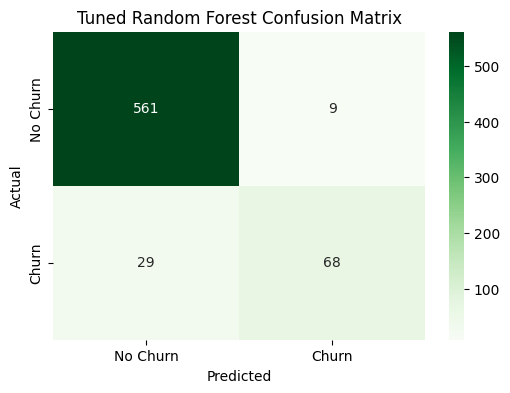

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, log_loss, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20],      # Maximum depth of the trees
    'min_samples_split': [2, 5, 10]   # Minimum number of samples required to split an internal node
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters:", grid_search.best_params_)
print("Best AUC-ROC score:", grid_search.best_score_)

# Evaluate the best model on the test set
best_rf_model = grid_search.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test)
y_prob_best_rf = best_rf_model.predict_proba(X_test)[:, 1]

print("Best Random Forest Model Evaluation:")
print(classification_report(y_test, y_pred_best_rf))
print(f"Accuracy: {accuracy_score(y_test, y_pred_best_rf)}")
print(f"AUC-ROC: {roc_auc_score(y_test, y_prob_best_rf)}")
print(f"Precision: {precision_score(y_test, y_pred_best_rf)}")
print(f"Recall: {recall_score(y_test, y_pred_best_rf)}")
print(f"F1 Score: {f1_score(y_test, y_pred_best_rf)}")
print(f"Log Loss: {log_loss(y_test, y_prob_best_rf)}")

# Confusion Matrix Visualization for Tuned Random Forest
plt.figure(figsize=(6, 4))
conf_matrix_best_rf = confusion_matrix(y_test, y_pred_best_rf)
sns.heatmap(conf_matrix_best_rf, annot=True, fmt='d', cmap='Greens', xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Tuned Random Forest Confusion Matrix")
plt.show()

### Tuned Decision Tree

Best parameters for Decision Tree: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10}
Best AUC-ROC score for Decision Tree: 0.8876680337206653
Best Decision Tree Model Evaluation:
              precision    recall  f1-score   support

       False       0.95      0.97      0.96       570
        True       0.81      0.68      0.74        97

    accuracy                           0.93       667
   macro avg       0.88      0.83      0.85       667
weighted avg       0.93      0.93      0.93       667

Accuracy: 0.9310344827586207
AUC-ROC: 0.8409477301501176
Precision: 0.8148148148148148
Recall: 0.6804123711340206
F1 Score: 0.7415730337078652
Log Loss: 2.0979365504203242


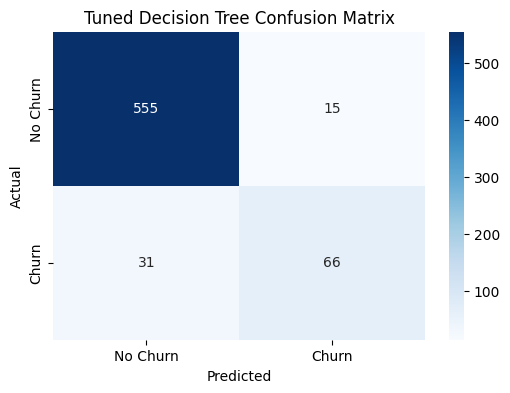

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, log_loss, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define the parameter grid for Decision Tree
param_grid_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV object for Decision Tree
grid_search_dt = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), param_grid=param_grid_dt, cv=5, scoring='roc_auc', n_jobs=-1)

# Fit the grid search to the training data
grid_search_dt.fit(X_train, y_train)

# Print the best parameters and the best score for Decision Tree
print("Best parameters for Decision Tree:", grid_search_dt.best_params_)
print("Best AUC-ROC score for Decision Tree:", grid_search_dt.best_score_)

# Evaluate the best Decision Tree model on the test set
best_dt_model = grid_search_dt.best_estimator_
y_pred_best_dt = best_dt_model.predict(X_test)
y_prob_best_dt = best_dt_model.predict_proba(X_test)[:, 1]

print("Best Decision Tree Model Evaluation:")
print(classification_report(y_test, y_pred_best_dt))
print(f"Accuracy: {accuracy_score(y_test, y_pred_best_dt)}")
print(f"AUC-ROC: {roc_auc_score(y_test, y_prob_best_dt)}")
print(f"Precision: {precision_score(y_test, y_pred_best_dt)}")
print(f"Recall: {recall_score(y_test, y_pred_best_dt)}")
print(f"F1 Score: {f1_score(y_test, y_pred_best_dt)}")
print(f"Log Loss: {log_loss(y_test, y_prob_best_dt)}")

# Confusion Matrix Visualization for Tuned Decision Tree
plt.figure(figsize=(6, 4))
conf_matrix_best_dt = confusion_matrix(y_test, y_pred_best_dt)
sns.heatmap(conf_matrix_best_dt, annot=True, fmt='d', cmap='Blues', xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Tuned Decision Tree Confusion Matrix")
plt.show()


## Model evaluation

In [35]:
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    print(f"\n{model_name} Model Evaluation:")
    print(classification_report(y_test, y_pred))
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"AUC-ROC: {roc_auc_score(y_test, y_prob)}")
    print(f"Precision: {precision_score(y_test, y_pred)}")
    print(f"Recall: {recall_score(y_test, y_pred)}")
    print(f"F1 Score: {f1_score(y_test, y_pred)}")
    print(f"Log Loss: {log_loss(y_test, y_prob)}")

evaluate_model(logreg_model, X_test, y_test, "Logistic Regression")
evaluate_model(dt_model, X_test, y_test, "Decision Tree")
evaluate_model(rf_model, X_test, y_test, "Random Forest")
evaluate_model(best_rf_model, X_test, y_test, "Tuned Random Forest")
evaluate_model(best_dt_model, X_test, y_test, "Tuned Decision Tree")



Logistic Regression Model Evaluation:
              precision    recall  f1-score   support

       False       0.88      0.96      0.92       570
        True       0.53      0.24      0.33        97

    accuracy                           0.86       667
   macro avg       0.71      0.60      0.62       667
weighted avg       0.83      0.86      0.84       667

Accuracy: 0.8590704647676162
AUC-ROC: 0.8165671911738108
Precision: 0.5348837209302325
Recall: 0.23711340206185566
F1 Score: 0.32857142857142857
Log Loss: 0.3341397074932195

Decision Tree Model Evaluation:
              precision    recall  f1-score   support

       False       0.94      0.95      0.95       570
        True       0.71      0.65      0.68        97

    accuracy                           0.91       667
   macro avg       0.82      0.80      0.81       667
weighted avg       0.91      0.91      0.91       667

Accuracy: 0.9100449775112444
AUC-ROC: 0.8019352504973773
Precision: 0.7078651685393258
Recall: 0.649

## Evaluation Obeservation
The Tuned Random Forest emerged as the best model, achieving the highest AUC-ROC and F1 Score, indicating superior classification performance and balance between precision and recall. Random Forest models outperformed Decision Trees, highlighting the strength of ensemble learning, while hyperparameter tuning significantly improved results. Logistic Regression performed reasonably but was outshined by non-linear models. AUC-ROC was a key metric, reflecting the models' ability to distinguish between classes, while lower log loss indicated better probability calibration. Overall, Tuned Random Forest is the optimal choice, and further improvements could involve feature engineering or advanced ensemble techniques.

# Conclusion  & Recommendation

# Conclusion

Based on the analysis, we developed multiple machine learning models to predict customer churn for SyriaTel, including Logistic Regression, Decision Tree, and Random Forest. Among these models, the Random Forest classifier demonstrated the best performance in terms of accuracy, recall, F1-score, and AUC-ROC, making it the most suitable choice for predicting customer churn.

Our analysis identified key factors influencing churn, such as call usage, billing history, international plan subscriptions, and customer service interactions. Customers who frequently contacted customer service, had higher call charges, or were subscribed to international plans exhibited a higher likelihood of churning.

# Recommendations




*  Customer Service Improvement: Since customer interactions with service
representatives significantly impact churn, SyriaTel should enhance customer service quality by reducing response times and improving issue resolution.
*  Personalized Offers & Discounts: Customers with high call charges and international plans show a tendency to churn. Offering targeted discounts or loyalty benefits may improve retention.

*  Proactive Engagement Strategies: Using the churn prediction model, SyriaTel can proactively engage at-risk customers with retention campaigns before they decide to leave.
*  Billing Transparency & Custom Plans: Many customers churn due to unexpected billing charges. Providing clear billing statements and flexible pricing plans can help reduce dissatisfaction.


*   Ongoing Model Monitoring & Improvement: The churn model should be continuously monitored and refined with new data to maintain accuracy and adapt to changing customer behaviors.
*  By implementing these strategies, SyriaTel can significantly reduce customer churn, improve customer satisfaction, and enhance overall revenue and market share.
